In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,Sequential
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/new_dataset.csv')

In [6]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00


In [7]:
df.iloc[:,1]

0          97.0
1          96.0
2          95.0
3          96.0
4          97.0
           ... 
2292024    98.0
2292025    99.0
2292026    98.0
2292027    96.0
2292028    97.0
Name: spo2, Length: 2292029, dtype: float64

In [8]:
cols = ['spo2', 'bpm', 'rr', 'sbp', 'dbp', 'mbp']
df['merge_values'] = df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis=1)

In [9]:
df.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,merge_values
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,97.0/63.5/18.0/112.0/78.0/87.0
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,96.0/64.0/16.0/106.0/71.0/81.0
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,95.0/61.0/15.0/105.0/65.0/78.0
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,96.0/63.0/23.0/102.0/65.0/76.0
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,97.0/57.0/18.0/105.0/75.0/84.0


In [10]:
all_values = df['merge_values'].str.split(pat="/")
all_values.head(3)

0    [97.0, 63.5, 18.0, 112.0, 78.0, 87.0]
1    [96.0, 64.0, 16.0, 106.0, 71.0, 81.0]
2    [95.0, 61.0, 15.0, 105.0, 65.0, 78.0]
Name: merge_values, dtype: object

In [11]:
df = df.drop( ['patient_id','start_time', 'end_time', 'merge_values'], axis=1)

In [12]:
def diseases(symptoms):
    
    spo2 = float(symptoms[0])
    hr = float(symptoms[1])
    rr = float(symptoms[2])
    sbp = float(symptoms[3])
    dbp = float(symptoms[4])
    mbp = float(symptoms[5])
    
    Three = ((spo2<91) and (sbp<70)) | ((hr>130) and (rr>30))
    
    Two = ((hr<40) and (rr<=9) and((spo2>=91) and (spo2<=93)) and ((sbp>=70) and (sbp<=80))) | (((hr>=111) and (hr<=130)) and ((rr>=21) and (rr<=30)) and (sbp>=200))
    
    One = (((hr>=40) and (hr<=50)) and ((spo2>=94) and (spo2<=95)) and ((sbp>=81) and (sbp<=180))) | (((hr>=111) and (hr<=110)) and ((rr>=15) and (rr<=20)) and ((sbp>=180) and (sbp<=200)))  
    
    Zero = ((hr>=51) and (hr<=100)) and ((rr>9) and (rr<=14)) and (spo2>95) and ((sbp>=101) and (sbp<180)) 
    
    if Three:
        three = 3
        return three
    if Two:
        two = 2
        return two
    if One:
        one = 1
        return one
    if Zero:
        zero = 0
        return zero
    else:
        normal = 00


        return normal

In [13]:
df.head(2)

,spo2,bpm,rr,sbp,dbp,mbp
0,97.0,63.5,18.0,112.0,78.0,87.0
1,96.0,64.0,16.0,106.0,71.0,81.0


In [14]:
df['labels'] = all_values.apply(diseases)

In [15]:
df['labels'].value_counts()

0    2278880
3       8719
1       4158
2        272
Name: labels, dtype: int64

In [16]:
df.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
0,97.0,63.5,18.0,112.0,78.0,87.0,0
1,96.0,64.0,16.0,106.0,71.0,81.0,0
2,95.0,61.0,15.0,105.0,65.0,78.0,0
3,96.0,63.0,23.0,102.0,65.0,76.0,0
4,97.0,57.0,18.0,105.0,75.0,84.0,0


In [17]:
labeled_data = df.copy()

In [18]:
labeled_data.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
0,97.0,63.5,18.0,112.0,78.0,87.0,0
1,96.0,64.0,16.0,106.0,71.0,81.0,0
2,95.0,61.0,15.0,105.0,65.0,78.0,0
3,96.0,63.0,23.0,102.0,65.0,76.0,0
4,97.0,57.0,18.0,105.0,75.0,84.0,0


In [19]:
labeled_data.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
0,97.0,63.5,18.0,112.0,78.0,87.0,0
1,96.0,64.0,16.0,106.0,71.0,81.0,0
2,95.0,61.0,15.0,105.0,65.0,78.0,0
3,96.0,63.0,23.0,102.0,65.0,76.0,0
4,97.0,57.0,18.0,105.0,75.0,84.0,0


In [20]:
dftest = labeled_data[labeled_data['labels'] != 0]

In [21]:
dftest.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
498,88.5,90.0,21.5,60.0,100.0,26.0,3
979,99.0,132.0,39.0,101.0,40.5,86.0,3
1383,95.0,48.0,14.0,90.0,56.0,67.0,1
1398,95.0,50.0,11.0,82.0,48.0,59.0,1
1401,94.5,45.0,10.0,102.0,62.0,75.0,1


In [22]:
labels = dftest.iloc[:,6]
num_labels = Counter(labels)
num_labels

Counter({1: 4158, 2: 272, 3: 8719})

In [23]:
dftest['labels'].value_counts()

3    8719
1    4158
2     272
Name: labels, dtype: int64

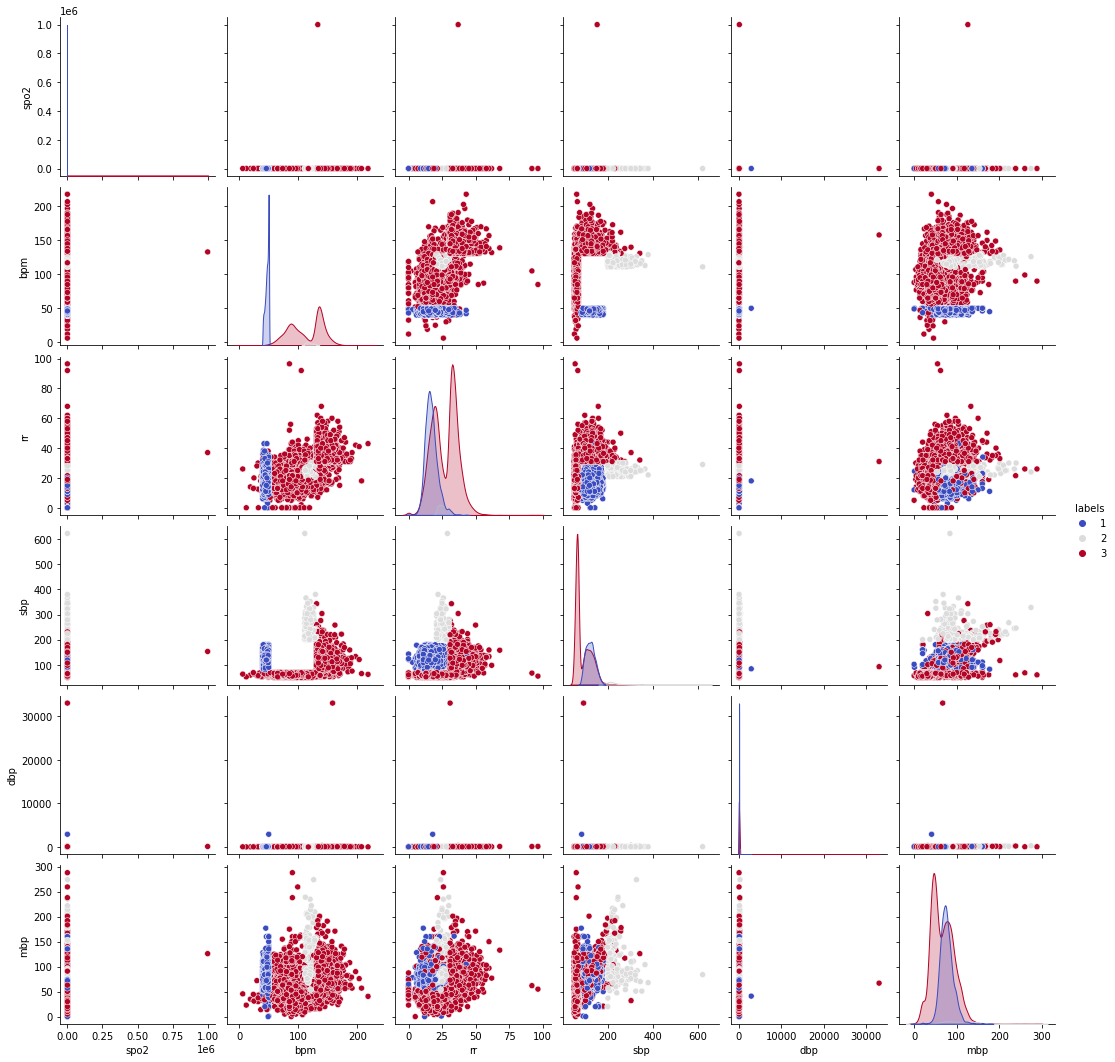

In [24]:
sns.pairplot(dftest,hue='labels',palette='coolwarm')

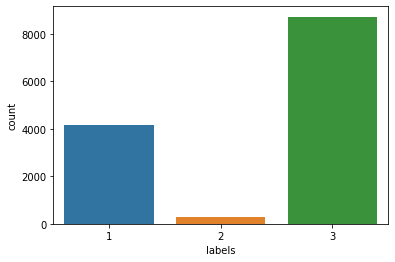

In [25]:
sns.countplot(x='labels',data=dftest)

In [26]:
dftest.shape

(13149, 7)

In [27]:
dftest.head()

,spo2,bpm,rr,sbp,dbp,mbp,labels
498,88.5,90.0,21.5,60.0,100.0,26.0,3
979,99.0,132.0,39.0,101.0,40.5,86.0,3
1383,95.0,48.0,14.0,90.0,56.0,67.0,1
1398,95.0,50.0,11.0,82.0,48.0,59.0,1
1401,94.5,45.0,10.0,102.0,62.0,75.0,1


In [28]:
X = dftest.iloc[:, 1:-1].values

In [29]:
X

array([[ 90. ,  21.5,  60. , 100. ,  26. ],
       [132. ,  39. , 101. ,  40.5,  86. ],
       [ 48. ,  14. ,  90. ,  56. ,  67. ],
       ...,
       [ 73.5,  18. ,  63. ,  73. ,  63. ],
       [ 85. ,  19. ,  65. ,  74.5,  30. ],
       [134. ,  33. , 107. ,  83. ,  91. ]])

In [30]:
y = dftest.iloc[:, -1].values

In [31]:
y

array([3, 3, 1, ..., 3, 3, 3])

In [32]:
X.shape

(13149, 5)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])

(10519, 5)
(10519,)
[3 1 1 3 3 3 3 3 3 3]


In [35]:
# y_test = tf.one_hot(y_test, depth=4)
# y_train = tf.one_hot(y_train, depth=4)

y_test = tf.one_hot(tf.cast(tf.reshape(y_test, -1), dtype=tf.int32), depth=4)
y_train = tf.one_hot(tf.cast(tf.reshape(y_train, -1), dtype=tf.int32), depth=4)


In [36]:
print(y_train[:5])

tf.Tensor(
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(5, 4), dtype=float32)


In [37]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:5])

(10519, 5)
(10519, 4)
tf.Tensor(
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(5, 4), dtype=float32)


In [38]:
model = Sequential()

model.add(layers.Dense(128, input_shape=[5]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
Total params: 11,700
Trainable params: 11,700
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 0.2820 - accuracy: 0.9593 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.9743 - val_loss: 0.0430 - val_accuracy: 0.9901
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9868 - val_loss: 0.0428 - val_accuracy: 0.9897
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3334 - accuracy: 0.9813 - val_loss: 0.0351 - val_accuracy: 0.9916
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9885 - val_loss: 0.0302 - val_accuracy: 0.9932
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9909 - val_loss: 0.0269 - val_accuracy: 0.9943
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3914 - accuracy: 0.9851 - val_loss: 0.0364 - val_accuracy: 0.9909
Epoch 

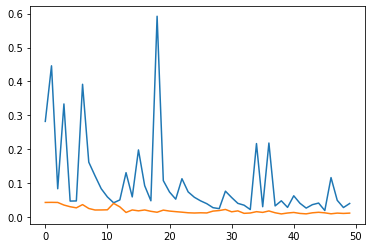

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(50)

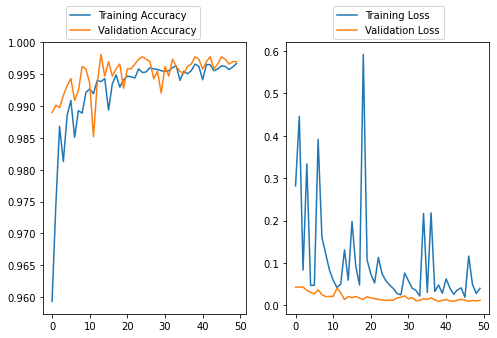

In [45]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

In [46]:
model.evaluate(X_test,y_test)

83/83 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9970


[0.011294684372842312, 0.9969581961631775]

In [47]:
y_hat = model.predict(X_test)

In [48]:
print(y_hat[0])
print(y_test[0])

[0.0000000e+00 6.0775015e-27 2.3625010e-10 1.0000000e+00]
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)


In [49]:
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

In [50]:
print(y_hat[:10])
print(y_test[:10])

[3 3 3 3 3 1 1 3 3 1]
[3 3 3 3 3 1 1 3 3 1]


In [51]:
conf_matrix = confusion_matrix(y_test, y_hat)

In [52]:
conf_matrix

array([[ 830,    0,    2],
       [   0,   44,    1],
       [   4,    1, 1748]])

In [53]:
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[0,2]+conf_matrix[1,0]+conf_matrix[1,1]+conf_matrix[1,2]+conf_matrix[2,0]+conf_matrix[2,1]+conf_matrix[2,2])


In [54]:
print(accuracy)

0.996958174904943


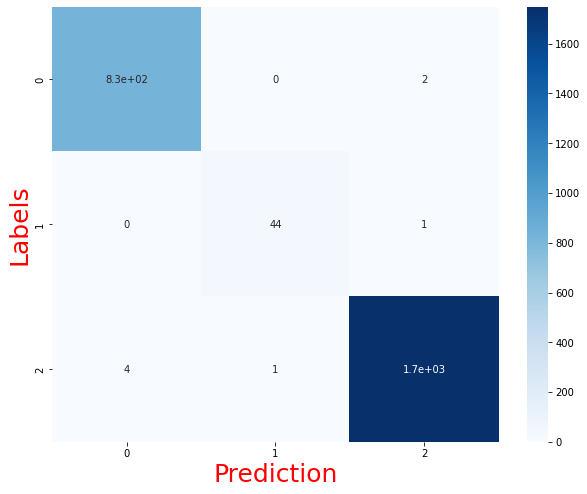

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap( conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()